1. imports + load dm4 + extract data4d

C:\Users\pkwki\anaconda3\envs\matsci465\lib\site-packages\rsciio\utils\tools.py:93: VisibleDeprecationWarning: get_file_handle has been moved to `rsciio.utils.file` and will be removed from `rsciio.utils.tools` in version 1.0.
  warnings.warn(message, VisibleDeprecationWarning)
C:\Users\pkwki\anaconda3\envs\matsci465\lib\site-packages\rsciio\utils\rgb_tools.py:46: VisibleDeprecationWarning: The module `rsciio.utils.rgb_tools` has been renamed to `rsciio.utils.rgb` and it will be removed in version 1.0.
  warnings.warn(
C:\Users\pkwki\anaconda3\envs\matsci465\lib\site-packages\rsciio\utils\tools.py:93: VisibleDeprecationWarning: ensure_directory has been moved to `rsciio.utils.path` and will be removed from `rsciio.utils.tools` in version 1.0.
  warnings.warn(message, VisibleDeprecationWarning)
C:\Users\pkwki\anaconda3\envs\matsci465\lib\site-packages\rsciio\utils\tools.py:93: VisibleDeprecationWarning: append2pathname has been moved to `rsciio.utils.path` and will be removed from `rsci

Loaded: <class 'hyperspy._signals.signal2d.Signal2D'>
Shape: (480, 448, 77, 17) dtype: uint16
ny,nx,ky,kx = 480 448 77 17


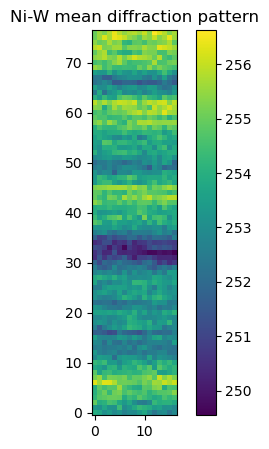

In [4]:
import hyperspy.api as hs
import numpy as np
import matplotlib.pyplot as plt

path = r"C:\Users\pkwki\Downloads\Si-SiGe.dm4"

s = hs.load(path)

print("Loaded:", type(s))
print("Shape:", s.data.shape, "dtype:", s.data.dtype)

# Your data shape looks like (ny,nx,ky,kx) already
data4d = s.data.astype(np.float32)
ny, nx, ky, kx = data4d.shape
print("ny,nx,ky,kx =", ny,nx,ky,kx)

# quick mean DP
mean_dp = data4d.mean(axis=(0,1))
plt.figure(figsize=(5,5))
plt.imshow(mean_dp, origin="lower")
plt.title("Ni-W mean diffraction pattern")
plt.colorbar()
plt.show()

run pipeline and plot segmentation + fingerprints

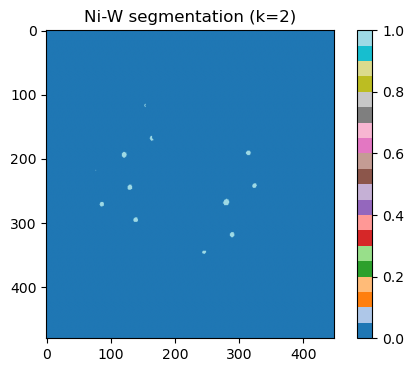

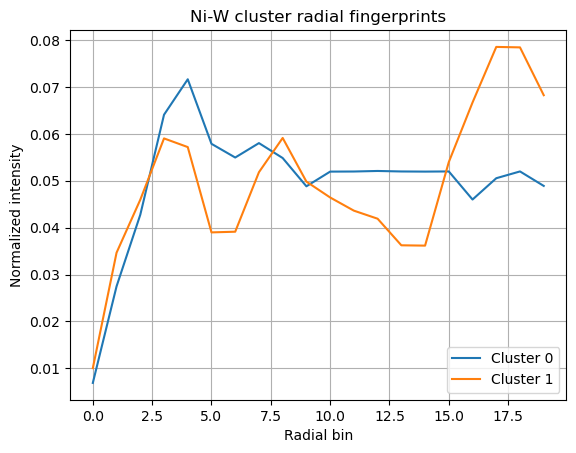

In [5]:
from pipeline import run_pipeline
import numpy as np
import matplotlib.pyplot as plt

out = run_pipeline(data4d, nbins=20, method="kmeans", k=2, pca_use=5, exclude_low_q=0)

labels = out["labels"]
Ximg = out["Xfeat_img"]   # (ny,nx,nbins)

plt.figure(figsize=(6,4))
plt.imshow(labels, cmap="tab20")
plt.title("Ni-W segmentation (k=2)")
plt.colorbar()
plt.show()

# cluster radial fingerprints (mean radial profile per cluster)
nbins = Ximg.shape[-1]
fingerprints = []
for c in np.unique(labels):
    m = (labels == c)
    fp = Ximg[m].mean(axis=0)
    fingerprints.append(fp)

plt.figure()
for c, fp in enumerate(fingerprints):
    plt.plot(fp, label=f"Cluster {c}")
plt.xlabel("Radial bin")
plt.ylabel("Normalized intensity")
plt.title("Ni-W cluster radial fingerprints")
plt.legend()
plt.grid(True)
plt.show()